# Homework 1

# 人工智能82 冯旭 2183211388

# 1 理论推导

## 1.1 卷积与互相关

### 1.1.1 定义

卷积：
$$
S[f](m,n)=w\ast f=\sum_{i=-k}^{k}\sum_{j=-k}^{k}w(i,j)f(m-i,n-j)
$$
互相关：
$$
S[f](m,n)=w\otimes f=\sum_{i=-k}^{k}\sum_{j=-k}^{k}w(i,j)f(m+i,n+j)
$$

### 1.1.2 性质
1. 线性：
$$
f'=af+bg
$$
\begin{equation}
\begin{aligned}
w\otimes f'&=\sum_{i=-k}^{k}\sum_{j=-k}^{k}w(i,j)f'(m+i,n+j)\\
    &=a\sum_{i=-k}^{k}\sum_{j=-k}^{k}w(i,j)f(m+i,n+j)+b\sum_{i=-k}^{k}\sum_{j=-k}^{k}w(i,j)g(m+i,n+j)\\
    &=a(w\otimes f)+b(w\otimes g)\\
\end{aligned}
\end{equation}

2. 位移性质：
$$
f'(m,n)=f(m-m_0,n-n_0)
$$
\begin{equation}
\begin{aligned}
(w\otimes f')(m,n)&=\sum_{i=-k}^{k}\sum_{j=-k}^{k}w(i,j)f'(m+i,n+j)\\
    &=\sum_{i=-k}^{k}\sum_{j=-k}^{k}w(i,j)f(m-m_0+i,n-n_0+j)\\
    &=(w\otimes f)(m-m_0,n-n_0)\\
\end{aligned}
\end{equation}


3. 交换律：
$$
i'=m-i,j'=n-j
$$
\begin{equation}
\begin{aligned}
(w\ast f)(m,n)&=\sum_{i=-k}^{k}\sum_{j=-k}^{k}w(i,j)f(m-i,n-j)\\
    &=\sum_{i'=-k}^{k}\sum_{j'=-k}^{k}w(m-i',n-j')f(i',j')\\
    &=(f\ast w)(m,n)\\
\end{aligned}
\end{equation}


4. 结合律：
\begin{equation}
\begin{aligned}
\mathcal{F}[v\ast(w\ast f)]&=\mathcal{F}(v)\mathcal{F}(w\ast f)\\
    &=\mathcal{F}(v)\mathcal{F}(w)\mathcal{F}(f)\\
    &=\mathcal{F}(v\ast w)\mathcal{F}(f)\\
    &=\mathcal{F}[(v\ast w)\ast f]\\
\end{aligned}
\end{equation}
$$
v\ast(w\ast f)=(v\ast w)\ast f
$$


### 1.1.3 复杂度 $O(whk^2)$

## 1.2 高斯核

### 1.2.1 2D高斯核的可分离性

\begin{equation}
\begin{aligned}
w(x,y)&=\frac{1}{2\pi \sigma^2}\exp\{-\frac{x^2+y^2}{2\sigma^2}\}\\
    &=\frac{1}{\sqrt{2\pi} \sigma}\exp\{-\frac{x^2}{2\sigma^2}\}\cdot \frac{1}{\sqrt{2\pi} \sigma}\exp\{-\frac{y^2}{2\sigma^2}\}\\
\end{aligned}
\end{equation}

\begin{equation}
\begin{aligned}
S[f](m,n)&=(w\ast f)(m,n)\\
    &=\sum_{i=-k}^{k}\sum_{j=-k}^{k}w(i,j)f(m-i,n-j)\\
    &=\sum_{i=-k}^{k}\sum_{j=-k}^{k}\frac{1}{\sqrt{2\pi} \sigma}\exp\{-\frac{i^2}{2\sigma^2}\}\cdot \frac{1}{\sqrt{2\pi} \sigma}\exp\{-\frac{j^2}{2\sigma^2}\}f(m-i,n-j)\\
    &=\sum_{i=-k}^{k}[\frac{1}{\sqrt{2\pi} \sigma}\exp\{-\frac{i^2}{2\sigma^2}\} (\sum_{j=-k}^{k}\frac{1}{\sqrt{2\pi} \sigma}\exp\{-\frac{j^2}{2\sigma^2}\}f(m-i,n-j))]\\
    &=u\ast(v\ast f)(m,n)
\end{aligned}
\end{equation}

### 1.2.2 2D高斯核的卷积
考虑一般情况, $d$维随机变量$X,Y$：
$$
X\sim \mathcal{N}(\mathbf{\mu_X},\Sigma_X),Y\sim \mathcal{N}(\mathbf{\mu_Y},\Sigma_Y),Z=X+Y
$$

$$
X\ast Y=\int f_X(\mathbf{x})f_Y(\mathbf{z-x})d\mathbf{x}=f_Z(\mathbf{z})\sim \mathcal{N}(\mathbf{\mu_X+\mu_Y},\Sigma_X+\Sigma_Y)
$$
$$
\mu_Z=\mu_X+\mu_Y,\Sigma_Z=\Sigma_X+\Sigma_Y
$$

概率密度函数：
$$
f_X(\mathbf{x})=\frac{1}{(\sqrt{2\pi})^d\sqrt{|\Sigma_X|}}\exp\{-\frac{1}{2}(\mathbf{x}-\mathbf{\mu_X})^T\Sigma_X^{-1}(\mathbf{x}-\mathbf{\mu_X})\}
$$
$$
f_Y(\mathbf{y})=\frac{1}{(\sqrt{2\pi})^d\sqrt{|\Sigma_Y|}}\exp\{-\frac{1}{2}(\mathbf{y}-\mathbf{\mu_Y})^T\Sigma_Y^{-1}(\mathbf{y}-\mathbf{\mu_Y})\}
$$
由于2D高斯核的性质：
$$
\mu_Z=\mu_X+\mu_Y=0
$$
$$
\Sigma_Z=\Sigma_X+\Sigma_Y=
\begin{bmatrix}
\sigma_X^2 & 0\\
0 & \sigma_X^2
\end{bmatrix}
+
\begin{bmatrix}
\sigma_Y^2 & 0\\
0 & \sigma_Y^2
\end{bmatrix}
=
\begin{bmatrix}
\sigma_X^2+\sigma_Y^2 & 0\\
0 & \sigma_X^2+\sigma_Y^2
\end{bmatrix}
$$
2D高斯核的卷积：
\begin{equation}
\begin{aligned}
X\ast Y&=f_Z(\mathbf{z})\\
    &=\frac{1}{2\pi(\sigma_X^2+\sigma_Y^2)}\exp\{-\frac{1}{2}\mathbf{z}^T\Sigma_Z^{-1}\mathbf{z}\}\\
    &=f_{X\ast Y}(x,y)\\
    &=\frac{1}{2\pi(\sigma_X^2+\sigma_Y^2)}\exp\{-\frac{1}{2}
    \begin{bmatrix}
    x\\
    y 
    \end{bmatrix}
    \begin{bmatrix}
    \frac{1}{\sigma_X^2+\sigma_Y^2} & 0\\
    0 & \frac{1}{\sigma_X^2+\sigma_Y^2}
    \end{bmatrix}
    \begin{bmatrix}
    x & y
    \end{bmatrix}
    \}\\
    &= \frac{1}{2\pi(\sigma_X^2+\sigma_Y^2)}\exp\{-\frac{x^2+y^2}{2(\sigma_X^2+\sigma_Y^2)}\}
\end{aligned}
\end{equation}

综上，两个不同方差的高斯核的卷积仍是高斯核，方差为：
$$
\sigma_{X\ast Y}^2=\sigma_X^2+\sigma_Y^2
$$

## 1.3 空域与频域的卷积定理

空域卷积定理：
$$
h(x,y)=(f\ast g)(x,y)
$$

\begin{equation}
\begin{aligned}
H(u,v)&=\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}f(m,n)g(x-m,y-n)dmdn e^{-i(2\pi ux+2\pi vy)}dxdy\\
    &=\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}f(m,n)\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}g(x-m,y-n) e^{-i(2\pi ux+2\pi vy)}dxdydmdn\\
    &= \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}f(m,n)G(u,v)e^{-i(2\pi um+2\pi vn)}dmdn\\
    &=G(u,v)\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}f(m,n)e^{-i(2\pi um+2\pi vn)}dmdn\\
    &=F(u,v)G(u,v)
\end{aligned}
\end{equation}
频域卷积定理同上易证。

# 2. 滤波实验

In [2]:
# 算法的实现均在../lib文件夹内
# opencv主要用来验证算法的正确性和图片展示

import cv2
import numpy as np
from matplotlib import pyplot as plt
import importlib
import copy
import sys 
sys.path.append("..")

# reload module in case that module changes
from lib import utils
importlib.reload(utils)
from lib import image_process
importlib.reload(image_process)

<module 'lib.image_process' from '..\\lib\\image_process.py'>

### 2.1.1 2D高斯模板设计

In [108]:
# 生成不同大小、方差的2D高斯滤波核，并与标准库的结果对比
k, sigma = 1, 1
print("k=1, sigma=1")
print("my kernel:")
print(str(image_process.generate_gaussian_kernel_2d(k, sigma)))
print("cv2:")
print(cv2.getGaussianKernel(2*k+1, sigma).dot(cv2.getGaussianKernel(2*k+1, sigma).T))

k, sigma = 2, 1.5
print("k=2, sigma=1.5")
print("my kernel:")
print(str(image_process.generate_gaussian_kernel_2d(k, sigma)))
print("cv2:")
print(cv2.getGaussianKernel(2*k+1, sigma).dot(cv2.getGaussianKernel(2*k+1, sigma).T))

k=1, sigma=1
my kernel:
[[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]
cv2:
[[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]
k=2, sigma=1.5
my kernel:
[[0.01441882 0.02808402 0.0350727  0.02808402 0.01441882]
 [0.02808402 0.05470021 0.06831229 0.05470021 0.02808402]
 [0.0350727  0.06831229 0.08531173 0.06831229 0.0350727 ]
 [0.02808402 0.05470021 0.06831229 0.05470021 0.02808402]
 [0.01441882 0.02808402 0.0350727  0.02808402 0.01441882]]
cv2:
[[0.01441882 0.02808402 0.0350727  0.02808402 0.01441882]
 [0.02808402 0.05470021 0.06831229 0.05470021 0.02808402]
 [0.0350727  0.06831229 0.08531173 0.06831229 0.0350727 ]
 [0.02808402 0.05470021 0.06831229 0.05470021 0.02808402]
 [0.01441882 0.02808402 0.0350727  0.02808402 0.01441882]]


In [17]:
print(cv2.getGaussianKernel(5, 1.085).dot(cv2.getGaussianKernel(5, 1.085).T))

[[0.00467878 0.01673027 0.02558349 0.01673027 0.00467878]
 [0.01673027 0.05982374 0.0914809  0.05982374 0.01673027]
 [0.02558349 0.0914809  0.1398902  0.0914809  0.02558349]
 [0.01673027 0.05982374 0.0914809  0.05982374 0.01673027]
 [0.00467878 0.01673027 0.02558349 0.01673027 0.00467878]]


### 2.1.2 图像的边界处理方法

Text(0.5, 1.0, 'Reflect Across Edge')

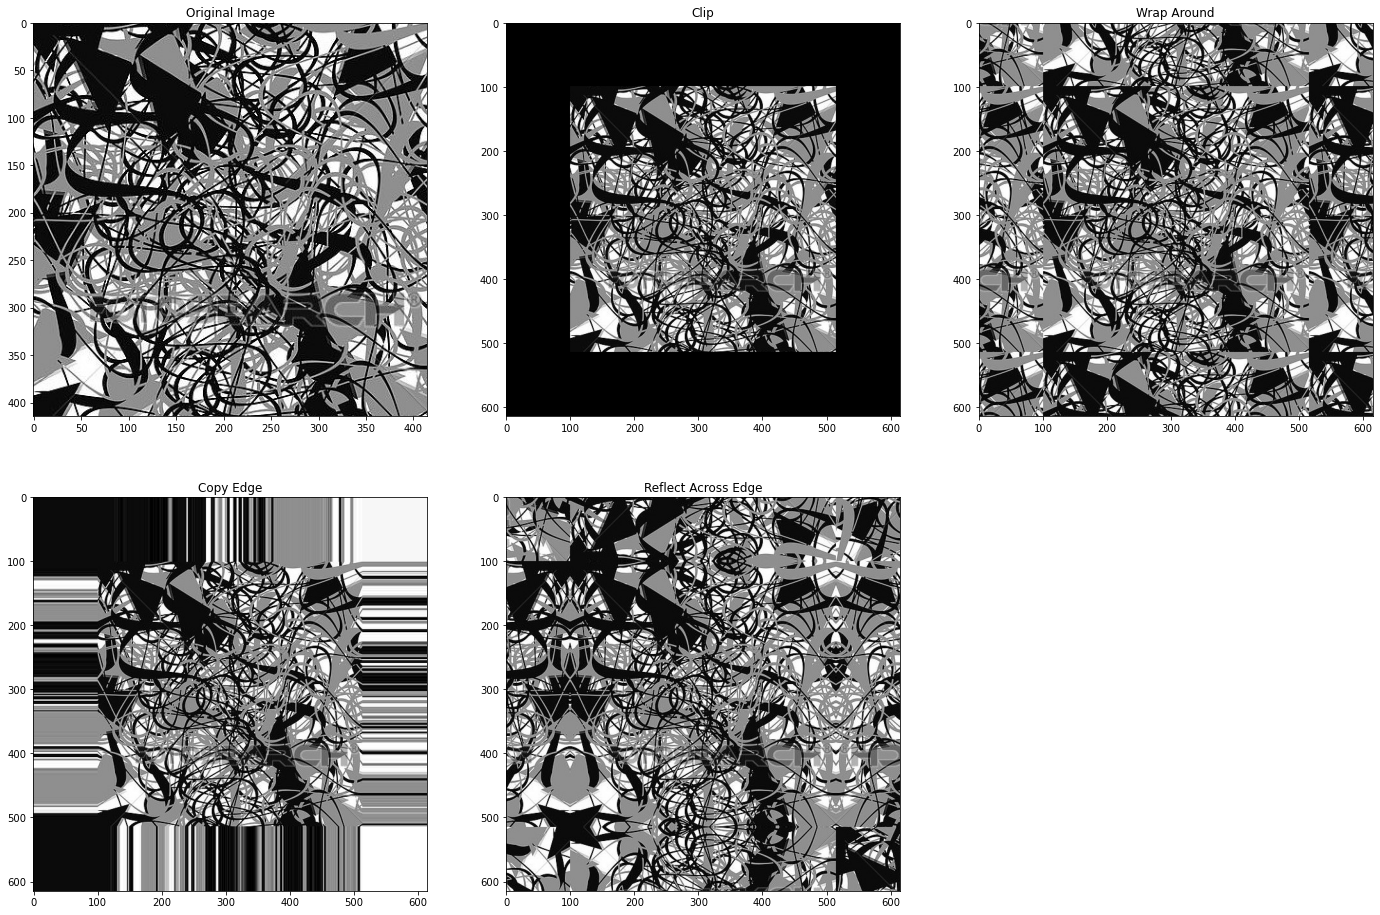

In [15]:
# 不同的边界处理方法对比。由于full convolution和same convolution类似，这里只展示full convolution的情况。
plt.figure(figsize=(24,16))

plt.subplot(231)
img = cv2.imread('img/example_01.jpg', cv2.IMREAD_GRAYSCALE)
utils.show_img(img)
plt.title("Original Image")
plt.subplot(232)
img_full_clip = image_process.boundary_process(img, 50, 'full', 'clip')
utils.show_img(img_full_clip)
plt.title("Clip")
plt.subplot(233)
img_full_wrap = image_process.boundary_process(img, 50, 'full', 'wrap')
utils.show_img(img_full_wrap)
plt.title("Wrap Around")
plt.subplot(234)
img_full_copy = image_process.boundary_process(img, 50, 'full', 'copy')
utils.show_img(img_full_copy)
plt.title("Copy Edge")
plt.subplot(235)
img_full_reflect = image_process.boundary_process(img, 50, 'full', 'reflect')
utils.show_img(img_full_reflect)
plt.title("Reflect Across Edge")

### 2.1.3 不同边界条件下的高斯滤波

Text(0.5, 1.0, 'gaussian filter: cond=same, padding=reflect, k=9, sigma=2')

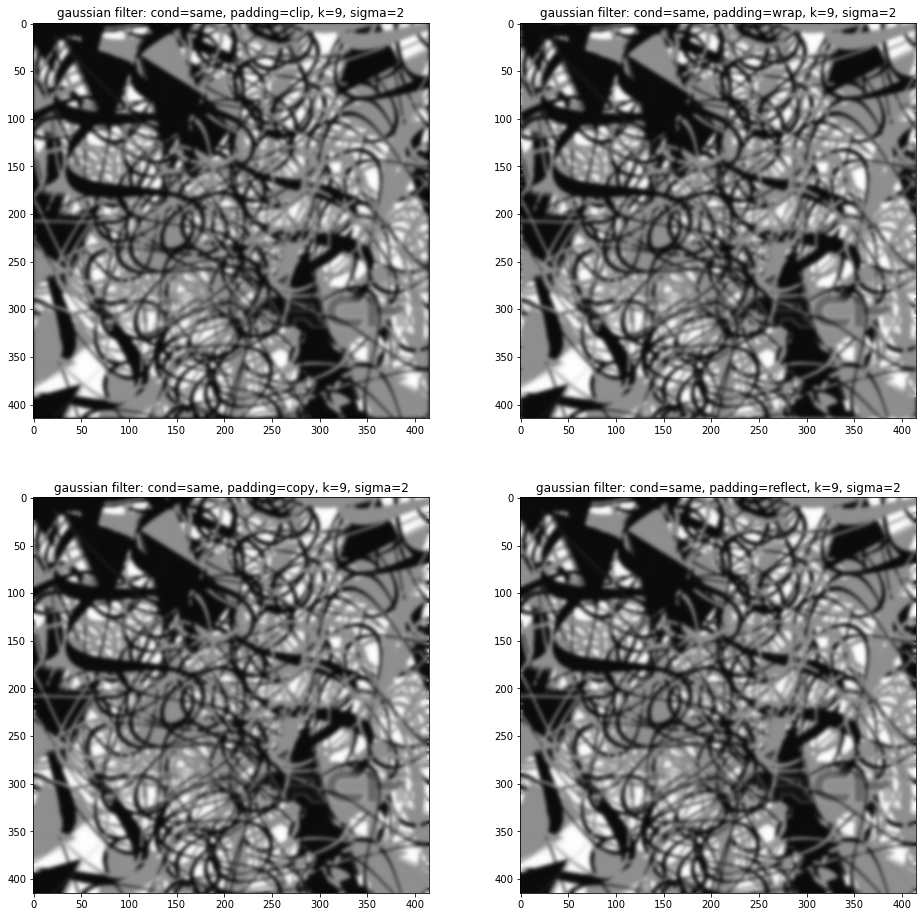

In [25]:
# 在保持same convolution的条件下，采用不同的padding methods，对比高斯滤波效果
plt.figure(figsize=(16,16))

# clip方法下，滤波后的图片边缘会产生明显的黑色阴影
plt.subplot(2,2,1)
cond, padding, k, sigma = 'same', 'clip', 9, 2
img_gaussian_filtered_1 = image_process.separable_gaussian_filter(image_process.boundary_process(img, k, cond, padding), k, sigma)
utils.show_img(img_gaussian_filtered_1)
plt.title("gaussian filter: cond={}, padding={}, k={}, sigma={}".format(cond, padding, k, sigma))

# wrap方法下，滤波后的图片边缘部分产生明显的黑色阴影
plt.subplot(2,2,2)
cond, padding, k, sigma = 'same', 'wrap', 9, 2
img_gaussian_filtered_2 = image_process.separable_gaussian_filter(image_process.boundary_process(img, k, cond, padding), k, sigma)
utils.show_img(img_gaussian_filtered_2)
plt.title("gaussian filter: cond={}, padding={}, k={}, sigma={}".format(cond, padding, k, sigma))

# copy方法下，滤波后的图片效果较好
plt.subplot(2,2,3)
cond, padding, k, sigma = 'same', 'copy', 9, 2
img_gaussian_filtered_3 = image_process.separable_gaussian_filter(image_process.boundary_process(img, k, cond, padding), k, sigma)
utils.show_img(img_gaussian_filtered_3)
plt.title("gaussian filter: cond={}, padding={}, k={}, sigma={}".format(cond, padding, k, sigma))

# reflect方法下，滤波后的图片效果较好
plt.subplot(2,2,4)
cond, padding, k, sigma = 'same', 'reflect', 9, 2
img_gaussian_filtered_4 = image_process.separable_gaussian_filter(image_process.boundary_process(img, k, cond, padding), k, sigma)
utils.show_img(img_gaussian_filtered_4)
plt.title("gaussian filter: cond={}, padding={}, k={}, sigma={}".format(cond, padding, k, sigma))

### 2.2.1 高斯核的卷积

Text(0.5, 1.0, 'sigma=2*sqrt(2)')

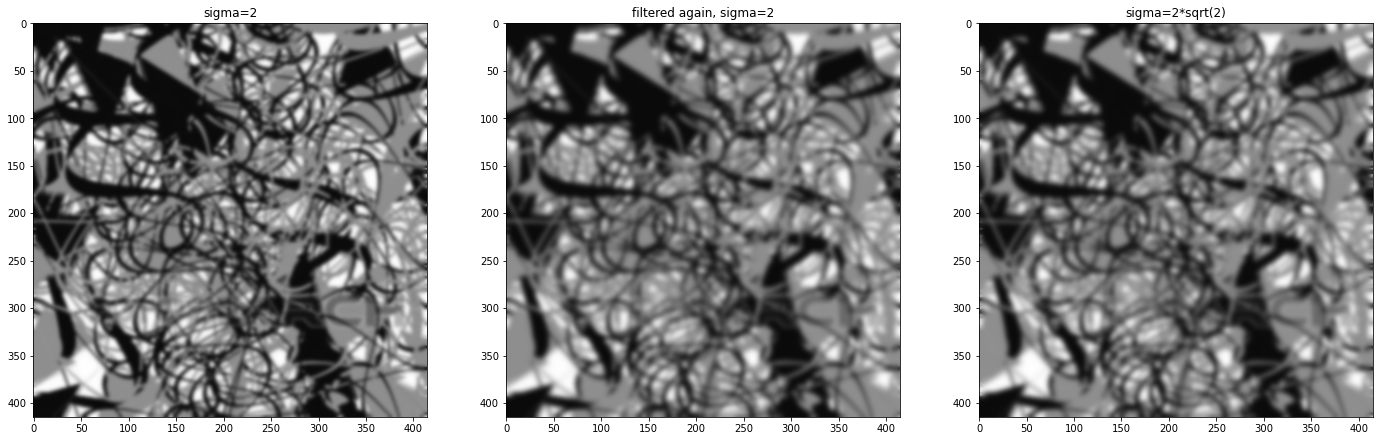

In [75]:
# 根据1.2.2， 两个高斯核卷积结果的方差等于原来两个高斯核方差之和
plt.figure(figsize=(24,8))

# 先对原图进行sigma=2的高斯滤波
plt.subplot(1,3,1)
cond, padding, k, sigma = 'same', 'reflect', 6, 2
img_gaussian_filtered_1 = image_process.separable_gaussian_filter(image_process.boundary_process(img, k, cond, padding), k, sigma)
utils.show_img(img_gaussian_filtered_1)
plt.title("sigma=2")

# 在第一张图的基础上，再进行sigma=2的高斯滤波
plt.subplot(1,3,2)
cond, padding, k, sigma = 'same', 'reflect', 6, 2
img_gaussian_filtered_2 = image_process.separable_gaussian_filter(image_process.boundary_process(img_gaussian_filtered_1, k, cond, padding), k, sigma)
utils.show_img(img_gaussian_filtered_2)
plt.title("filtered again, sigma=2")

# 直接进行sigma=2*sqrt(2)的高斯滤波，效果与第二张图基本相同
plt.subplot(1,3,3)
cond, padding, k, sigma = 'same', 'reflect', 8, 2*np.sqrt(2)
img_gaussian_filtered_3 = image_process.separable_gaussian_filter(image_process.boundary_process(img, k, cond, padding), k, sigma)
utils.show_img(img_gaussian_filtered_3)
plt.title("sigma=2*sqrt(2)")

### 2.2.2 可分离式高斯滤波器

Text(0.5, 1.0, 'Time difference between no-separable and separable gaussian filter')

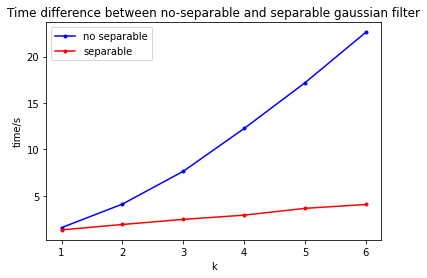

In [77]:
# 对比不使用和使用分离式高斯滤波器所花费的时间
import time

k_list = [1, 2, 3, 4, 5, 6]
sigma = 1
no_separable_time = []
separable_time = []

for k in k_list:
    # 不使用分离式高斯滤波器
    start = time.time()
    cond, padding = 'same', 'reflect'
    img_gaussian_filtered_1 = image_process.gaussian_filter(image_process.boundary_process(img, k, cond, padding), k, sigma)
    end = time.time()
    no_separable_time.append(end - start)
    # 使用分离式高斯滤波器
    start = time.time()
    cond, padding = 'same', 'reflect'
    img_gaussian_filtered_1 = image_process.separable_gaussian_filter(image_process.boundary_process(img, k, cond, padding), k, sigma)
    end = time.time()
    separable_time.append(end - start)
plt.plot(k_list, no_separable_time, '.b-', label='no separable')
plt.plot(k_list, separable_time, '.r-', label='separable')
plt.xlabel('k')
plt.ylabel('time/s')
plt.legend()
plt.title('Time difference between no-separable and separable gaussian filter')

### 2.2.3 不同方差的高斯核滤波

Text(0.5, 1.0, 'k=12, sigma=4')

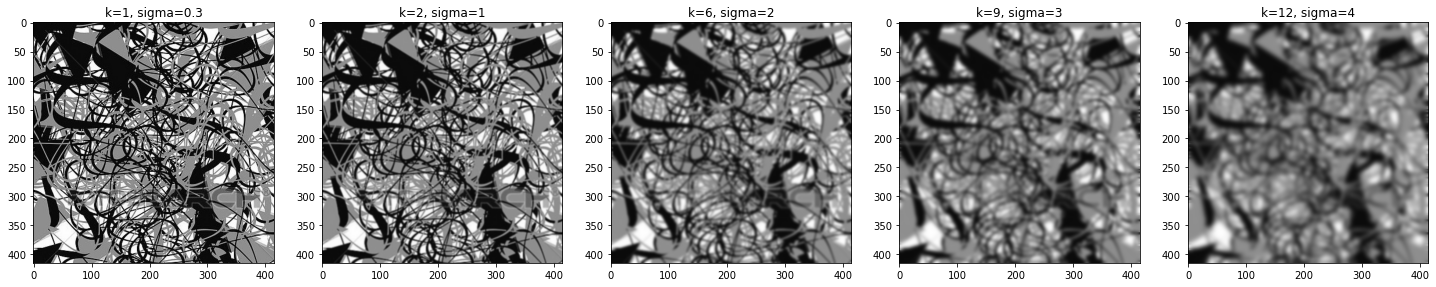

In [93]:
plt.figure(figsize=(25,5))
plt.subplot(151)
cond, padding, k, sigma = 'same', 'reflect', 1, 0.3
img_gaussian_filtered = image_process.separable_gaussian_filter(image_process.boundary_process(img, k, cond, padding), k, sigma)
utils.show_img(img_gaussian_filtered)
plt.title("k={}, sigma={}".format(k, sigma))
plt.subplot(152)
cond, padding, k, sigma = 'same', 'reflect', 2, 1
img_gaussian_filtered = image_process.separable_gaussian_filter(image_process.boundary_process(img, k, cond, padding), k, sigma)
utils.show_img(img_gaussian_filtered)
plt.title("k={}, sigma={}".format(k, sigma))
plt.subplot(153)
cond, padding, k, sigma = 'same', 'reflect', 6, 2
img_gaussian_filtered = image_process.separable_gaussian_filter(image_process.boundary_process(img, k, cond, padding), k, sigma)
utils.show_img(img_gaussian_filtered)
plt.title("k={}, sigma={}".format(k, sigma))
plt.subplot(154)
cond, padding, k, sigma = 'same', 'reflect', 9, 3
img_gaussian_filtered = image_process.separable_gaussian_filter(image_process.boundary_process(img, k, cond, padding), k, sigma)
utils.show_img(img_gaussian_filtered)
plt.title("k={}, sigma={}".format(k, sigma))
plt.subplot(155)
cond, padding, k, sigma = 'same', 'reflect', 12, 4
img_gaussian_filtered = image_process.separable_gaussian_filter(image_process.boundary_process(img, k, cond, padding), k, sigma)
utils.show_img(img_gaussian_filtered)
plt.title("k={}, sigma={}".format(k, sigma))

## 2.3 利用高斯模糊实现锐化效果

Text(0.5, 1.0, 'sharpen k=9, sigma=3, alpha=0.2')

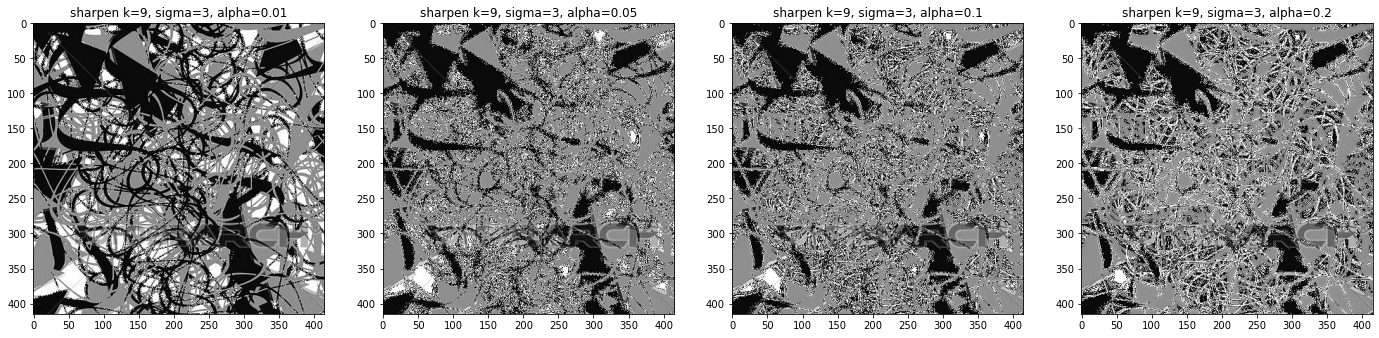

In [94]:
# 原理：# f = f + a(f - f_blur)
plt.figure(figsize=(24,6))
plt.subplot(141)
cond, padding, k, sigma, alpha = 'same', 'reflect', 9, 3, 0.01
img_sharpened = image_process.sharpening_filter(image_process.boundary_process(img, k, cond, padding), k, sigma, alpha)
utils.show_img(img_sharpened)
plt.title("sharpen k={}, sigma={}, alpha={}".format(k, sigma, alpha))
plt.subplot(142)
cond, padding, k, sigma, alpha = 'same', 'reflect', 9, 3, 0.05
img_sharpened = image_process.sharpening_filter(image_process.boundary_process(img, k, cond, padding), k, sigma, alpha)
utils.show_img(img_sharpened)
plt.title("sharpen k={}, sigma={}, alpha={}".format(k, sigma, alpha))
plt.subplot(143)
cond, padding, k, sigma, alpha = 'same', 'reflect', 9, 3, 0.1
img_sharpened = image_process.sharpening_filter(image_process.boundary_process(img, k, cond, padding), k, sigma, alpha)
utils.show_img(img_sharpened)
plt.title("sharpen k={}, sigma={}, alpha={}".format(k, sigma, alpha))
plt.subplot(144)
cond, padding, k, sigma, alpha = 'same', 'reflect', 9, 3, 0.2
img_sharpened = image_process.sharpening_filter(image_process.boundary_process(img, k, cond, padding), k, sigma, alpha)
utils.show_img(img_sharpened)
plt.title("sharpen k={}, sigma={}, alpha={}".format(k, sigma, alpha))

## 2.4 双边滤波

Text(0.5, 1.0, 'bilateral k=9, sigma_s=3, sigma_r=1')

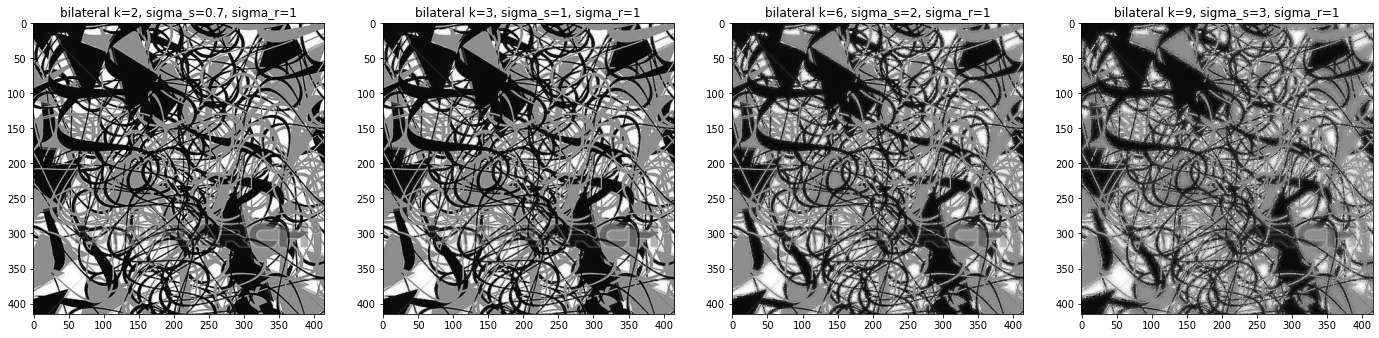

In [101]:
# 双边滤波可以较好的保留边缘, 如2.4图4和2.2.3图4
plt.figure(figsize=(24,6))
plt.subplot(141)
cond, padding, k, sigma_s, sigma_r = 'same', 'reflect', 2, 0.7, 1
img_bilateral_filtered = image_process.bilateral_filter(image_process.boundary_process(img, k, cond, padding), k, sigma_s, sigma_r)
utils.show_img(img_bilateral_filtered)
plt.title("bilateral k={}, sigma_s={}, sigma_r={}".format(k, sigma_s, sigma_r))
plt.subplot(142)
cond, padding, k, sigma_s, sigma_r = 'same', 'reflect', 3, 1, 1
img_bilateral_filtered = image_process.bilateral_filter(image_process.boundary_process(img, k, cond, padding), k, sigma_s, sigma_r)
utils.show_img(img_bilateral_filtered)
plt.title("bilateral k={}, sigma_s={}, sigma_r={}".format(k, sigma_s, sigma_r))
plt.subplot(143)
cond, padding, k, sigma_s, sigma_r = 'same', 'reflect', 6, 2, 1
img_bilateral_filtered = image_process.bilateral_filter(image_process.boundary_process(img, k, cond, padding), k, sigma_s, sigma_r)
utils.show_img(img_bilateral_filtered)
plt.title("bilateral k={}, sigma_s={}, sigma_r={}".format(k, sigma_s, sigma_r))
plt.subplot(144)
cond, padding, k, sigma_s, sigma_r = 'same', 'reflect', 9, 3, 1
img_bilateral_filtered = image_process.bilateral_filter(image_process.boundary_process(img, k, cond, padding), k, sigma_s, sigma_r)
utils.show_img(img_bilateral_filtered)
plt.title("bilateral k={}, sigma_s={}, sigma_r={}".format(k, sigma_s, sigma_r))

## 2.5 图像的傅里叶变换
### 2.5.1 显示幅度谱和相位谱

Text(0.5, 1.0, 'Phase Spectrum')

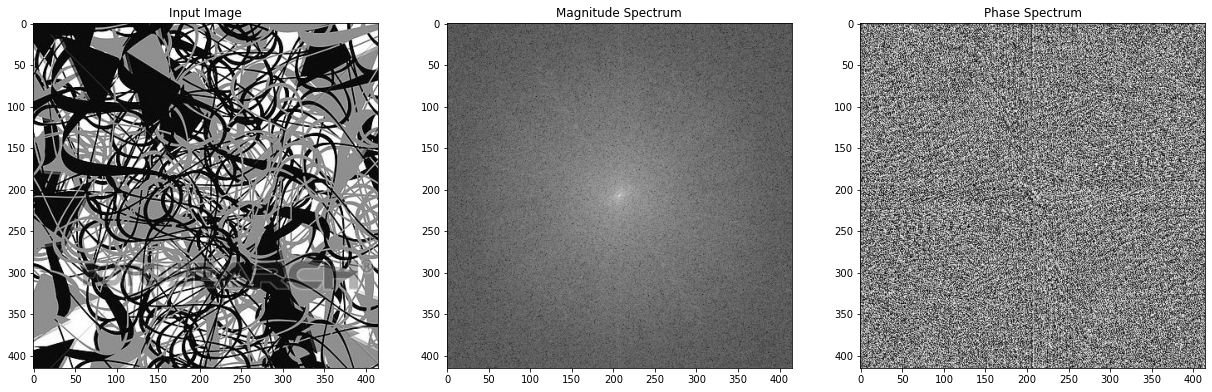

In [103]:
img_dft = image_process.fourier_transform(img)
magnitude_img = 20*np.log(np.abs(img_dft))
phase_img = np.angle(img_dft)*180/np.pi

plt.figure(figsize=(21,7))
plt.subplot(131)
utils.show_img(img)
plt.title('Input Image')
plt.subplot(132)
utils.show_img(utils.normalize(magnitude_img))
plt.title('Magnitude Spectrum')
plt.subplot(133)
utils.show_img(utils.normalize(phase_img))
plt.title('Phase Spectrum')

### 2.5.2 高斯滤波器频域滤波

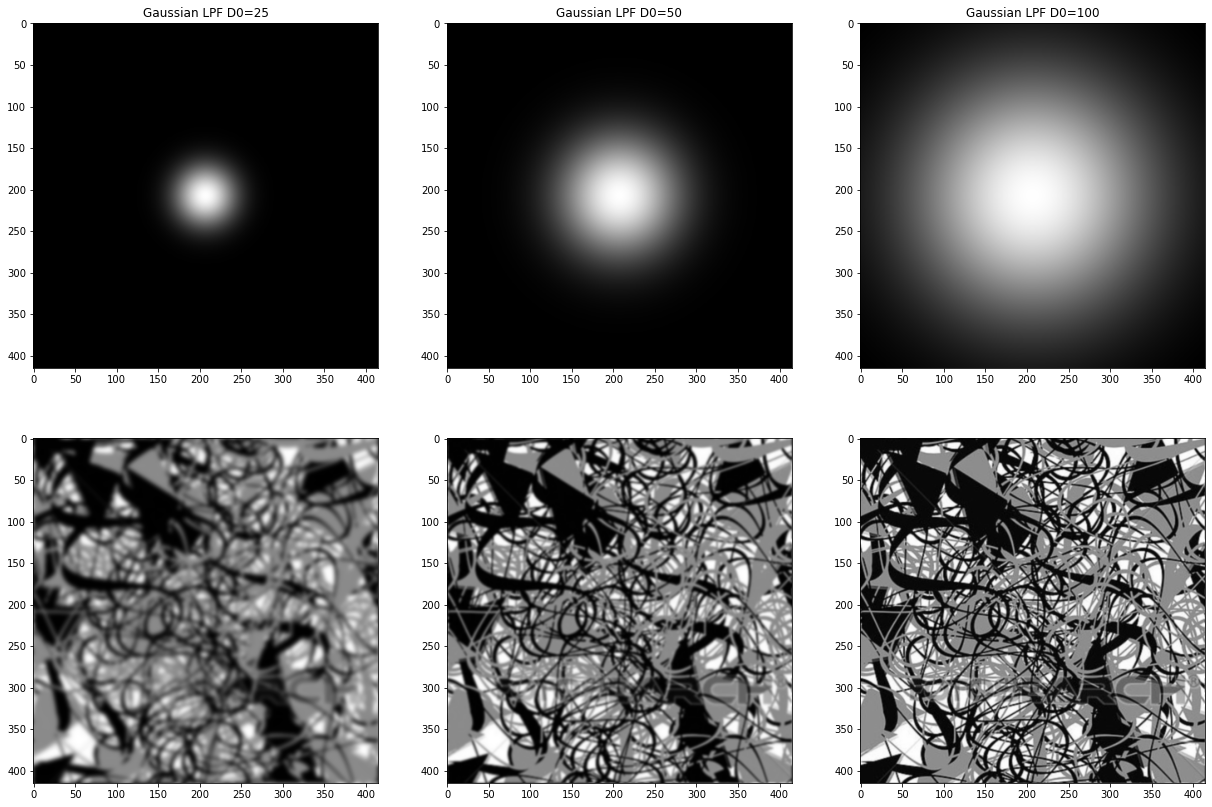

In [110]:
# 低通滤波，D0为截至频率
magnitude = np.abs(img_dft)
phase = np.angle(img_dft)

lpf_1 = image_process.generate_gaussian_lpf(img_dft, 25)
magnitude_1 = np.abs(img_dft)
magnitude_1 = magnitude_1*lpf_1
reconstructed_dft_1 = magnitude_1*np.exp(np.complex(0,1)*phase)
reconstructed_img_1 = image_process.inverse_fourier_transform(reconstructed_dft_1)

lpf_2 = image_process.generate_gaussian_lpf(img_dft, 50)
magnitude_2 = np.abs(img_dft)
magnitude_2 = magnitude_2*lpf_2
reconstructed_dft_2 = magnitude_2*np.exp(np.complex(0,1)*phase)
reconstructed_img_2 = image_process.inverse_fourier_transform(reconstructed_dft_2)

lpf_3 = image_process.generate_gaussian_lpf(img_dft, 100)
magnitude_3 = np.abs(img_dft)
magnitude_3 = magnitude_3*lpf_3
reconstructed_dft_3 = magnitude_3*np.exp(np.complex(0,1)*phase)
reconstructed_img_3 = image_process.inverse_fourier_transform(reconstructed_dft_3)


plt.figure(figsize=(21,14))
plt.subplot(231)
utils.show_img(utils.normalize(lpf_1))
plt.title('Gaussian LPF D0=25')
plt.subplot(232)
utils.show_img(utils.normalize(lpf_2))
plt.title('Gaussian LPF D0=50')
plt.subplot(233)
utils.show_img(utils.normalize(lpf_3))
plt.title('Gaussian LPF D0=100')
plt.subplot(234)
utils.show_img(utils.normalize(reconstructed_img_1))
plt.subplot(235)
utils.show_img(utils.normalize(reconstructed_img_2))
plt.subplot(236)
utils.show_img(utils.normalize(reconstructed_img_3))

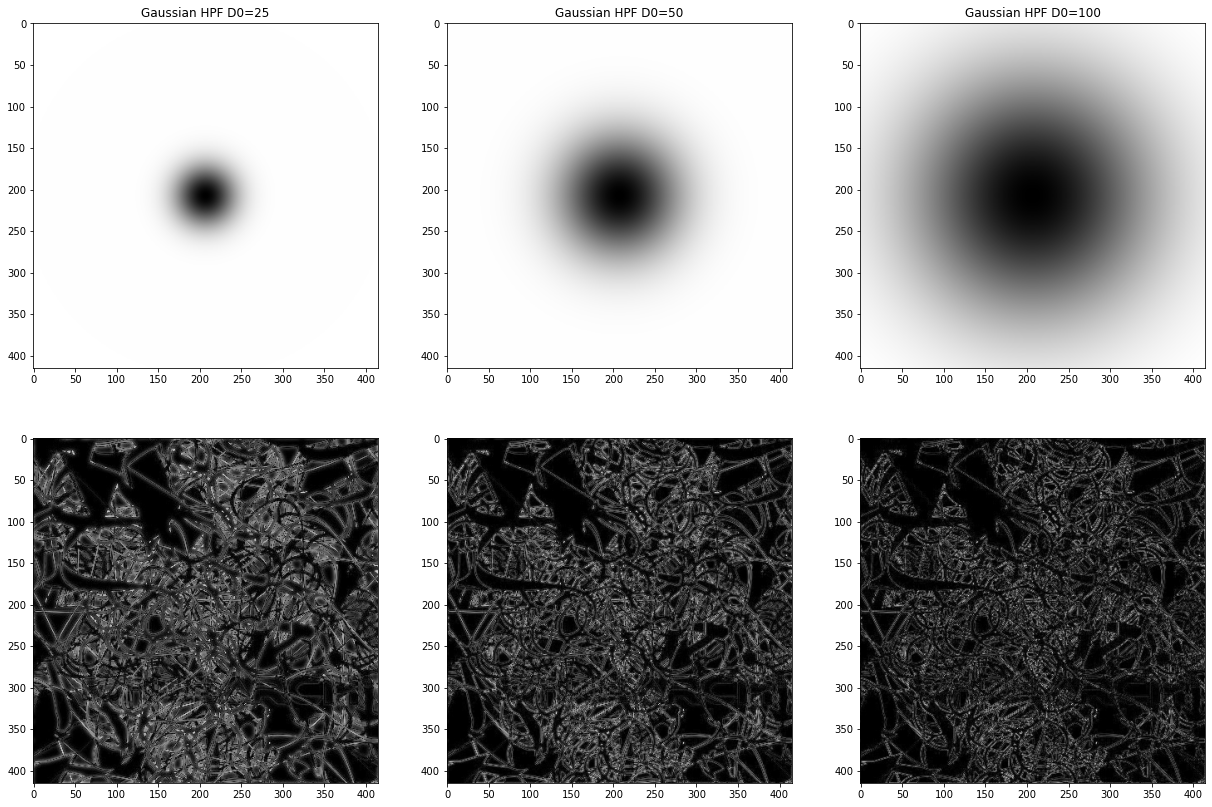

In [111]:
# 高通滤波，D0为截至频率
hpf_1 = image_process.generate_gaussian_hpf(img_dft, 25)
magnitude_1 = np.abs(img_dft)
magnitude_1 = magnitude_1*hpf_1
reconstructed_dft_1 = magnitude_1*np.exp(np.complex(0,1)*phase)
reconstructed_img_1 = image_process.inverse_fourier_transform(reconstructed_dft_1)

hpf_2 = image_process.generate_gaussian_hpf(img_dft, 50)
magnitude_2 = np.abs(img_dft)
magnitude_2 = magnitude_2*hpf_2
reconstructed_dft_2 = magnitude_2*np.exp(np.complex(0,1)*phase)
reconstructed_img_2 = image_process.inverse_fourier_transform(reconstructed_dft_2)

hpf_3 = image_process.generate_gaussian_hpf(img_dft, 100)
magnitude_3 = np.abs(img_dft)
magnitude_3 = magnitude_3*hpf_3
reconstructed_dft_3 = magnitude_3*np.exp(np.complex(0,1)*phase)
reconstructed_img_3 = image_process.inverse_fourier_transform(reconstructed_dft_3)


plt.figure(figsize=(21,14))
plt.subplot(231)
utils.show_img(utils.normalize(hpf_1))
plt.title('Gaussian HPF D0=25')
plt.subplot(232)
utils.show_img(utils.normalize(hpf_2))
plt.title('Gaussian HPF D0=50')
plt.subplot(233)
utils.show_img(utils.normalize(hpf_3))
plt.title('Gaussian HPF D0=100')
plt.subplot(234)
utils.show_img(utils.normalize(reconstructed_img_1))
plt.subplot(235)
utils.show_img(utils.normalize(reconstructed_img_2))
plt.subplot(236)
utils.show_img(utils.normalize(reconstructed_img_3))